In [9]:
import pandas as pd
import numpy as np


In [10]:
meta=pd.read_csv("/mnt/lab_data2/anusri/chrombpnet/results/variant_data/microglia_caqtls/feb11_2024/caqtls_microglia_formatted.tsv", sep="\t", header=0)


In [11]:
meta = meta[["CHROM", "POS", "non-effect_allele", "effect_allele", "Top_SNP_perPeak", "Z_score_fixed"]]
print(meta.head())

  CHROM          POS non-effect_allele effect_allele Top_SNP_perPeak  \
0  chr2  199884843.0                 A             G        rs281785   
1  chr2  200357680.0                 A             T       rs2033804   
2  chr2  200656660.0                 T             C       rs2287012   
3  chr1  172585461.0                 A             G      rs10752994   
4  chr1  172625478.0                 C             T      rs12123755   

   Z_score_fixed  
0       10.11000  
1       -3.48053  
2       -5.07707  
3      -11.41800  
4        8.27532  


In [12]:
peaks=pd.read_csv("/mnt/lab_data2/anusri/chrombpnet/results/variant_data/microglia_caqtls/feb11_2024/PeakInfoDetailed_210832_OCRs.csv", sep=",", header=0)

In [13]:
print(peaks.head())
print(peaks.shape)
#peaks["start"] = ((peaks["start"]+peaks["end"]) // 2) - 100
#peaks["end"] = peaks["start"]  + 200

    Chr   start     end   PeakID  distanceToTSS annotationSimple  \
0  chr1  817105  817588  Peak_13            0.0         Promoter   
1  chr1  819868  820628  Peak_14        -2157.0         Promoter   
2  chr1  820873  821328  Peak_15        -3162.0           Intron   
3  chr1  826886  828002  Peak_16            0.0         Promoter   
4  chr1  869728  870232  Peak_17            0.0         Promoter   

                                          annotation Associated.Gene.Name  \
0                                   Promoter (<=1kb)               FAM87B   
1                                   Promoter (2-3kb)           AL669831.4   
2  Intron (ENST00000635509/ENSG00000230021, intro...           AL669831.4   
3                                   Promoter (<=1kb)            LINC00115   
4                                   Promoter (<=1kb)               FAM41C   

                            Gene.type  
0                             lincRNA  
1  transcribed_unprocessed_pseudogene  
2  trans

In [14]:
preds = pd.read_csv("/mnt/lab_data2/anusri/variant-scorer/src/output/microglia_scatac/ATAC_new/summary.mean.variant_scores_new.tsv", sep="\t", header=0)
preds["sign.jsd.mean"] = preds["jsd.mean"]*np.sign(preds["logfc.mean"])
preds = preds[["chr", "pos", "rsid","allele1", "allele2", "logfc.mean",  "sign.jsd.mean"]]
preds.head()
print(preds.shape)

(4978, 7)


In [15]:
print(meta.shape)

(4979, 6)


In [16]:
meta = meta[~np.isnan(meta["POS"])]
print(meta.shape)

(4978, 6)


In [17]:
meta["POS"] = meta["POS"].astype(int) 
preds["pos"] = preds["pos"].astype(int) 
final = meta.merge(preds, left_on=["CHROM", "POS", "effect_allele", "non-effect_allele"], right_on=["chr", "pos", "allele1", "allele2"]).drop_duplicates()
print(final.shape)


(4978, 13)


In [18]:
final.head()

,CHROM,POS,non-effect_allele,effect_allele,Top_SNP_perPeak,Z_score_fixed,chr,pos,rsid,allele1,allele2,logfc.mean,sign.jsd.mean
0,chr2,199884843,A,G,rs281785,10.11000,chr2,199884843,chr2_199884843.0_G_A,G,A,0.032774,0.016354
1,chr2,200357680,A,T,rs2033804,-3.48053,chr2,200357680,chr2_200357680.0_T_A,T,A,-0.008075,-0.009565
2,chr2,200656660,T,C,rs2287012,-5.07707,chr2,200656660,chr2_200656660.0_C_T,C,T,0.003838,0.004759
3,chr1,172585461,A,G,rs10752994,-11.41800,chr1,172585461,chr1_172585461.0_G_A,G,A,0.005939,0.004529
4,chr1,172625478,C,T,rs12123755,8.27532,chr1,172625478,chr1_172625478.0_T_C,T,C,-0.441283,-0.047415


In [19]:
final.columns

Index(['CHROM', 'POS', 'non-effect_allele', 'effect_allele', 'Top_SNP_perPeak',
       'Z_score_fixed', 'chr', 'pos', 'rsid', 'allele1', 'allele2',
       'logfc.mean', 'sign.jsd.mean'],
      dtype='object')

In [21]:
cols = ['CHROM', "POS0", 'POS', 'non-effect_allele', 'effect_allele', 'Top_SNP_perPeak',
       'Z_score_fixed', 'logfc.mean', 'sign.jsd.mean']
final["POS0"] = final["POS"] - 1
finalf = final[cols]

In [22]:
peaks

,Chr,start,end,PeakID,distanceToTSS,annotationSimple,annotation,Associated.Gene.Name,Gene.type
0,chr1,817105,817588,Peak_13,0.0,Promoter,Promoter (<=1kb),FAM87B,lincRNA
1,chr1,819868,820628,Peak_14,-2157.0,Promoter,Promoter (2-3kb),AL669831.4,transcribed_unprocessed_pseudogene
2,chr1,820873,821328,Peak_15,-3162.0,Intron,"Intron (ENST00000635509/ENSG00000230021, intro...",AL669831.4,transcribed_unprocessed_pseudogene
3,chr1,826886,828002,Peak_16,0.0,Promoter,Promoter (<=1kb),LINC00115,lincRNA
4,chr1,869728,870232,Peak_17,0.0,Promoter,Promoter (<=1kb),FAM41C,lincRNA
...,...,...,...,...,...,...,...,...,...
210827,chrY,21439802,21440929,Peak_215075,-2558.0,Promoter,Promoter (2-3kb),RBMY2TP,unprocessed_pseudogene
210828,chrY,21481590,21481950,Peak_215076,-11569.0,Distal Intergenic,Distal Intergenic,RBMY1HP,unprocessed_pseudogene
210829,chrY,26403079,26403631,Peak_215077,2469.0,Promoter,Promoter (2-3kb),CYCSP48,processed_pseudogene
210830,chrY,26436428,26436771,Peak_215078,-17211.0,Distal Intergenic,Distal Intergenic,AC013734.1,processed_pseudogene


In [23]:
import pybedtools
beds_var = pybedtools.BedTool.from_dataframe(finalf)
peak_bed =  pybedtools.BedTool.from_dataframe(peaks)
sig_vars_in_bed = beds_var.intersect(peak_bed, c=True)

In [24]:
sig_vars_in_bed = sig_vars_in_bed.to_dataframe(names=cols+["IsUsed"]).drop_duplicates()


In [25]:
sig_vars_in_bed.head()

,CHROM,POS0,POS,non-effect_allele,effect_allele,Top_SNP_perPeak,Z_score_fixed,logfc.mean,sign.jsd.mean,IsUsed
0,chr2,199884842,199884843,A,G,rs281785,10.11000,0.032774,0.016354,0
1,chr2,200357679,200357680,A,T,rs2033804,-3.48053,-0.008075,-0.009565,0
2,chr2,200656659,200656660,T,C,rs2287012,-5.07707,0.003838,0.004759,0
3,chr1,172585460,172585461,A,G,rs10752994,-11.41800,0.005939,0.004529,0
4,chr1,172625477,172625478,C,T,rs12123755,8.27532,-0.441283,-0.047415,1


In [26]:
sig_vars_in_bed["IsUsed"] = sig_vars_in_bed["IsUsed"] > 0

In [27]:
sum(sig_vars_in_bed["IsUsed"])

956

In [28]:
sig_vars_in_bed.shape

(4978, 10)

In [29]:
sig_vars_in_bed["logfc.mean"] = -1*sig_vars_in_bed["logfc.mean"]

In [30]:
sig_vars_in_bed["sign.jsd.mean"] = -1*sig_vars_in_bed["sign.jsd.mean"]

In [31]:
sig_vars_in_bed.to_csv("../final_figures_new/microglia.caqtls.tsv", sep="\t", header=True, index=False)

In [33]:
import matplotlib.pyplot as plt

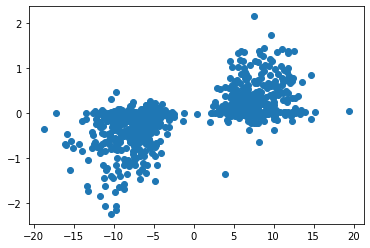

In [34]:
df=sig_vars_in_bed[sig_vars_in_bed["IsUsed"]]
plt.scatter(df["Z_score_fixed"], df["logfc.mean"])

In [36]:
import scipy.stats
scipy.stats.pearsonr(df["Z_score_fixed"], df["logfc.mean"])

(0.6123604665289462, 1.836191629240661e-99)